# Data Structures Hacks

## Imports, dict and simple functions

In [120]:
import http.client
import json

from IPython.display import Image
# from PIL import Image
import json
# from PIL import Image
import requests
from io import BytesIO


folklore_album = {
    "title": "Folklore",
    "artist": "Taylor Swift",
    "year": 2020,
    "genre": ["Indie Folk", "Alternative"],
    "tracks": {
        1: "the 1",
        2: "cardigan",
        3: "the last great american dynasty",
        4: "exile (feat. Bon Iver)",
        5: "my tears ricochet",
        6: "mirrorball",
        7: "seven",
        8: "august",
        9: "this is me trying",
        10: "illicit affairs",
        11: "invisible string",
        12: "mad woman",
        13: "epiphany",
        14: "betty",
        15: "peace",
        16: "hoax"
    }
}

def searchbyvalue(dict, searchvalue):
    for k,v in dict.items():
        if(v == searchvalue):
            return k
    return "404"

## Main Code

Fetching data for "my tears ricochet"...


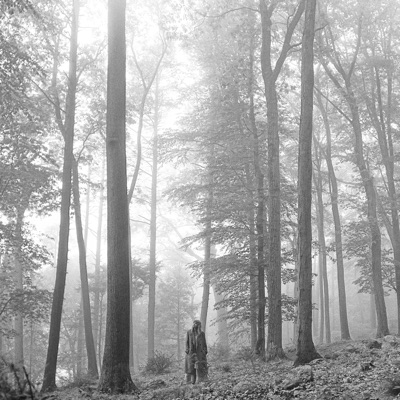

my tears ricochet
Link to play: https://www.shazam.com/track/531326573/my-tears-ricochet
{"tracks":{"hits":[{"track":{"layout":"5","type":"MUSIC","key":"531326573","title":"my tears ricochet","subtitle":"Taylor Swift","share":{"subject":"my tears ricochet - Taylor Swift","text":"I used Shazam to discover my tears ricochet by Taylor Swift.","href":"https://www.shazam.com/track/531326573/my-tears-ricochet","image":"https://is4-ssl.mzstatic.com/image/thumb/Music125/v4/7c/04/ba/7c04ba17-2ff8-21b3-0ac0-7d141f86e924/20UMGIM64216.rgb.jpg/400x400cc.jpg","twitter":"I used @Shazam to discover my tears ricochet by Taylor Swift.","html":"https://www.shazam.com/snippets/email-share/531326573?lang=en-US&country=US","avatar":"https://is4-ssl.mzstatic.com/image/thumb/AMCArtistImages112/v4/a0/4f/3e/a04f3ec4-4476-1a80-6a3e-6b3641251099/8988402d-d267-4dee-bc51-881135b2ab58_ami-identity-994af5c375f4c3aa96cd6ced4a700799-2022-10-12T00-51-40.037Z_cropped.png/800x800cc.jpg","snapchat":"https://www.shazam.com/

In [131]:
def fetchdata(songname):
    urlsongname = ""

    for char in songname:
        if char != ' ':
            urlsongname += char
        else:
            urlsongname+= '%'

    conn = http.client.HTTPSConnection("shazam.p.rapidapi.com")

    headers = {
        'X-RapidAPI-Key': "c0a73cc90fmshdc3d44c5a5834b9p18a538jsn06680b483b06",
        'X-RapidAPI-Host': "shazam.p.rapidapi.com"
        }

    conn.request("GET", "/search?term=" + urlsongname + "&locale=en-US&offset=0&limit=5", headers=headers)

    res = conn.getresponse()
    data = res.read()

    return(data.decode("utf-8"))

def getsongid(songname):
    conn = http.client.HTTPSConnection("shazam.p.rapidapi.com")

    headers = {
        'X-RapidAPI-Key': "SIGN-UP-FOR-KEY",
        'X-RapidAPI-Host': "shazam.p.rapidapi.com"
        }

    conn.request("GET", "/search?term=kiss%20the%20rain&locale=en-US&offset=0&limit=5", headers=headers)

    res = conn.getresponse()
    data = res.read()

    print(data.decode("utf-8"))

def main():
    query = input("What would you like to know about the album?")
    # print(folklore_album["tracks"].get(int(query)))
    queryFetched = folklore_album["tracks"].get(searchbyvalue(folklore_album["tracks"], query))
    if queryFetched == None:
        print("Invalid Search;\nTry searching one of the following: ", end="")
        for k,v in folklore_album["tracks"].items():
            print(v, end=", ")
    else:
        print("Fetching data for \""  + queryFetched + "\"...")
        data = fetchdata(queryFetched)

        datadict = json.loads(data)
        imageurl = datadict['tracks']['hits'][0]['track']['share']['image']

        image_data = requests.get(imageurl).content
        image = Image(image_data)
        display(image)

        print(queryFetched) # Name of song
        print("Link to play: " + datadict['tracks']['hits'][0]['track']['share']['href']) # Share url
        print(data)
          

main()